# Text Classification Le Matin

## Importation des librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import pickle
import re

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

## Importation des données

In [4]:
data = pd.read_csv('le_matin_articles.csv')
X, y = data.content, data.category
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)
data.dropna(inplace = True)

## Visualisation des catégories

In [5]:
data["category"].value_counts()

economie             1439
nation               1437
societe              1375
monde                1288
culture              1134
regions              1075
activites-royales     975
emploi                262
Name: category, dtype: int64

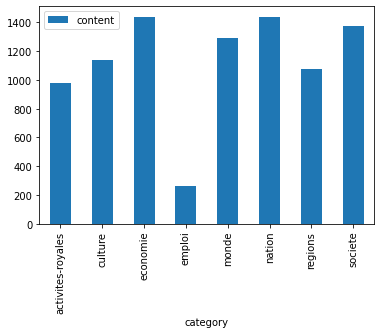

In [6]:
data.groupby('category').count().plot.bar(ylim=0)

## Preprocessing des données

In [7]:
stemmer = WordNetLemmatizer()

documents = []

for sen in range(0, len(X)):
  # suppresion des caractères spéciaux
  document = re.sub(r'\W', ' ', str(X[sen]))
  # suppresion des caractères uniques
  document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
  document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
  # suppresion des espaces multiples
  document = re.sub(r'\s+', ' ', document, flags=re.I)
  # suppresion des préfixes b
  document = re.sub(r'^b\s+', '', document)
  # concersion en minuscule
  document = document.lower()
  # lemmatisation
  document = document.split()
  document = [stemmer.lemmatize(word) for word in document]
  document = ' '.join(document)
  # ajout à la liste
  documents.append(document)

## Bag Of Words

In [8]:
# conversion des données textuelles en données numériques
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

## TF - IDF

In [9]:
# Term Frequency = Nombre d'occurences d'un mot / Nombre total des mots dans le document
# Inverse Document Frequency = log(Nombre total de documents / Nombre de documents contenant le mot)
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

## Division des données

In [10]:
# division des données en données d'entrapînement (80%) et données de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Forêts Aléatoires

### Entraînement du modèle

In [ ]:
# utilisation de l'algorithme des forêts aléatoires sur nos données d'entraînement
model_randomforest = RandomForestClassifier(n_estimators=1000, random_state=0)
model_randomforest.fit(X_train, y_train)

In [12]:
# prédiction à partir de nos données de test
y_pred = model_randomforest.predict(X_test)

### Evaluation du modèle

In [13]:
# évaluation du score globale du modèle
print(accuracy_score(y_test, y_pred))

0.4216666666666667


In [14]:
# évaluation de la précision : taux de prédictions positives correctes
# évaluation du recall : taux de positifs correctement prédits
# évaluation du f1-score : capacité d'un modèle à bien prédire les individus positifs
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

activites-royales       0.32      0.39      0.35       192
          culture       0.83      0.40      0.54       230
         economie       0.42      0.52      0.46       295
           emploi       0.90      0.17      0.29        52
            monde       0.51      0.45      0.48       253
           nation       0.40      0.48      0.44       284
          regions       0.37      0.24      0.29       228
          societe       0.34      0.45      0.39       266

         accuracy                           0.42      1800
        macro avg       0.51      0.39      0.41      1800
     weighted avg       0.47      0.42      0.42      1800



## Régression Logistique

### Entraînement du modèle

In [ ]:
# utilisation de la régression logistique sur nos données d'entraînement
model_logisticregression = LogisticRegression(random_state=0)
model_logisticregression.fit(X_train, y_train)

In [16]:
# prédiction à partir de nos données de test
y_pred = model_logisticregression.predict(X_test)

### Evaluation du modèle

In [17]:
# évaluation du score globale du modèle
print(accuracy_score(y_test, y_pred))

0.43333333333333335


In [18]:
# évaluation de la précision : taux de prédictions positives correctes
# évaluation du recall : taux de positifs correctement prédits
# évaluation du f1-score : capacité d'un modèle à bien prédire les individus positifs
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

activites-royales       0.49      0.30      0.37       192
          culture       0.52      0.47      0.49       230
         economie       0.39      0.57      0.46       295
           emploi       0.65      0.21      0.32        52
            monde       0.44      0.48      0.46       253
           nation       0.56      0.40      0.47       284
          regions       0.39      0.29      0.33       228
          societe       0.35      0.50      0.41       266

         accuracy                           0.43      1800
        macro avg       0.47      0.40      0.42      1800
     weighted avg       0.45      0.43      0.43      1800



## Arbre de décision

### Entraînement du modèle

In [ ]:
# utilisation d'arbres de décision sur nos données d'entraînement
model_decisiontree = DecisionTreeClassifier()
model_decisiontree.fit(X_train, y_train)

In [20]:
# prédiction à partir de nos données de test
y_pred = model_decisiontree.predict(X_test)

### Evaluation du modèle

In [21]:
# évaluation du score globale du modèle
print(accuracy_score(y_test, y_pred))

0.33055555555555555


In [22]:
# évaluation de la précision : taux de prédictions positives correctes
# évaluation du recall : taux de positifs correctement prédits
# évaluation du f1-score : capacité d'un modèle à bien prédire les individus positifs
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

activites-royales       0.25      0.39      0.30       192
          culture       0.61      0.29      0.39       230
         economie       0.31      0.40      0.35       295
           emploi       0.48      0.23      0.31        52
            monde       0.34      0.36      0.35       253
           nation       0.41      0.35      0.38       284
          regions       0.24      0.15      0.18       228
          societe       0.30      0.38      0.33       266

         accuracy                           0.33      1800
        macro avg       0.37      0.32      0.32      1800
     weighted avg       0.36      0.33      0.33      1800



## K Nearest Neighbour

### Entraînement du modèle

In [ ]:
# utilisation de l'algorithme des k plus proches voisins sur nos données d'entraînement
model_knn = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
model_knn.fit(X_train, y_train)

In [24]:
# prédiction à partir de nos données de test
y_pred = model_knn.predict(X_test)

### Evaluation du modèle

In [25]:
# évaluation du score globale du modèle
print(accuracy_score(y_test, y_pred))

0.3566666666666667


In [26]:
# évaluation de la précision : taux de prédictions positives correctes
# évaluation du recall : taux de positifs correctement prédits
# évaluation du f1-score : capacité d'un modèle à bien prédire les individus positifs
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

activites-royales       0.23      0.48      0.31       192
          culture       0.29      0.44      0.35       230
         economie       0.44      0.39      0.42       295
           emploi       0.39      0.13      0.20        52
            monde       0.68      0.30      0.41       253
           nation       0.40      0.35      0.37       284
          regions       0.34      0.19      0.24       228
          societe       0.38      0.41      0.39       266

         accuracy                           0.36      1800
        macro avg       0.39      0.34      0.34      1800
     weighted avg       0.40      0.36      0.36      1800



## Machine à vecteurs de support

### Entraînement du modèle

In [ ]:
# utilisation de la machine à vecteyrs de support sur nos données d'entraînement
model_svc = SVC()
model_svc.fit(X_train, y_train)

In [28]:
# prédiction à partir de nos données de test
y_pred = model_svc.predict(X_test)

### Evaluation du modèle

In [29]:
# évaluation du score globale du modèle
print(accuracy_score(y_test, y_pred))

0.43777777777777777


In [30]:
# évaluation de la précision : taux de prédictions positives correctes
# évaluation du recall : taux de positifs correctement prédits
# évaluation du f1-score : capacité d'un modèle à bien prédire les individus positifs
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

activites-royales       0.38      0.34      0.36       192
          culture       0.90      0.40      0.55       230
         economie       0.41      0.57      0.48       295
           emploi       0.65      0.21      0.32        52
            monde       0.53      0.46      0.49       253
           nation       0.46      0.45      0.46       284
          regions       0.40      0.30      0.34       228
          societe       0.32      0.53      0.40       266

         accuracy                           0.44      1800
        macro avg       0.51      0.41      0.42      1800
     weighted avg       0.49      0.44      0.44      1800

